In [1]:
#import libraries
import pandas as pd
from bs4 import BeautifulSoup
from scrapy import Selector
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import ttest_ind

In [2]:
#import data
data = pd.read_csv('datacleanedup.csv') 
data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters,specials,gas_type,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,0,0,0,45.0,other,E10,E10,1.38,1.4000,1.960000,0.070000
1,12.0,4.2,30,21.5,13,0,0,0,0.0,other,E10,E10,1.38,0.5040,0.254016,0.021168
2,11.2,5.5,38,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.6160,0.379456,0.033880
3,12.9,3.9,36,21.5,14,0,0,0,0.0,other,E10,E10,1.38,0.5031,0.253110,0.019621
4,18.5,4.5,46,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.8325,0.693056,0.037463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.0,0.0,39,0.0,18,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
750,0.0,0.0,38,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345
751,0.0,0.0,45,0.0,19,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
752,0.0,0.0,42,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345


## Preprocessing

### X - y split

In [3]:
X = data.drop(columns=['consume'])
y = data['consume']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Splitting numerical and categorical

In [5]:
num_train = X_train.select_dtypes(np.number)
num_test = X_test.select_dtypes(np.number)
cat_train = X_train.select_dtypes(object)
cat_test = X_test.select_dtypes(object)

### Encoding

In [6]:
# Fit encoder
encoder = OneHotEncoder(handle_unknown='ignore').fit(cat_train)
# Getting the column names for the later selection
column_name = encoder.get_feature_names_out(cat_train.columns)
# Encode train and test
cat_train_encoded = pd.DataFrame(encoder.transform(cat_train).toarray(),columns = column_name, index=cat_train.index)
cat_test_encoded = pd.DataFrame(encoder.transform(cat_test).toarray(),columns = column_name, index=cat_test.index)

### Scaling Numericals

In [7]:
scaler = MinMaxScaler().fit(num_train)
num_train_scaled = scaler.transform(num_train)
num_test_scaled = scaler.transform(num_test)
cols = scaler.get_feature_names_out(input_features = num_train.columns)
num_train_scaled = pd.DataFrame(num_train_scaled, columns=cols, index = num_train.index)
num_test_scaled = pd.DataFrame(num_test_scaled, columns=cols, index = num_test.index)

### Concatenating 

In [8]:
X_train_transformed = pd.concat([num_train_scaled, cat_train_encoded], axis = 1)
X_test_transformed = pd.concat([num_test_scaled, cat_test_encoded], axis = 1)

### Regression

In [9]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores_train = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_transformed, y_train, cv=5))
    scores_train[model_name] = mean_score
print(scores_train)

{'Decision Tree Regressor': 0.9689314355794624, 'Linear Regression': 0.9136039004492849, 'KNN': 0.8440598012052064}


In [10]:
import math
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(X_train_transformed,y_train)

LinearRegression()

In [11]:
predictions_test = LR.predict(X_test_transformed)
r2_score(y_test, predictions_test)

0.8901904510079666

In [12]:
predictions_train = LR.predict(X_train_transformed)
r2_score(y_train, predictions_train)

0.9506075800015227

In [13]:
mse_train=mean_squared_error(y_train,predictions_train)
print('The mean squared error train is ', mse_train)
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
print ('The root-mean-square error train is', rmse_train)
mae_train = mean_absolute_error(y_train, predictions_train)
print ('The mean absolute error train is', mae_train)
mse_test =mean_squared_error(y_test,predictions_test)
print('The mean squared error test is ', mse_test)
rmse_test = np.sqrt(mean_squared_error(y_test,predictions_test))
print ('The root-mean-square error test is', rmse_test)
mae_test = mean_absolute_error(y_test, predictions_test)
print ('The mean absolute error test is', mae_test)

The mean squared error train is  0.3287426292739957
The root-mean-square error train is 0.5733608194444365
The mean absolute error train is 0.2668714640997068
The mean squared error test is  0.6868381405577324
The root-mean-square error test is 0.8287569852240959
The mean absolute error test is 0.3350557953452582


In [14]:
print("LR Test score is: ", LR.score(X_test_transformed, y_test))
print("LR Train score is: ", LR.score(X_train_transformed, y_train))

LR Test score is:  0.8901904510079666
LR Train score is:  0.9506075800015227


### Applying Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

clf = RandomForestRegressor(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_transformed, y_train)
print('Train score: ', clf.score(X_train_transformed, y_train))
print('Test score: ' ,clf.score(X_test_transformed, y_test))

y_pred = clf.predict(X_test_transformed)
display(y_test.value_counts())

Train score:  0.9590354520338518
Test score:  0.9682456790849117


0.0    72
4.7     8
5.0     8
5.1     7
5.3     6
4.9     4
4.5     4
4.6     4
4.8     4
5.2     3
5.6     3
3.9     3
4.0     3
4.2     3
4.1     3
3.7     3
5.5     2
4.4     2
4.3     2
6.4     1
6.5     1
8.1     1
5.8     1
6.3     1
7.9     1
3.6     1
Name: consume, dtype: int64

The scores of our modeling are very low so we cannot use them to make predictions at our original data.

C:\Users\ninav\AppData\Local\Temp\ipykernel_15696\2318558432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<Axes: >

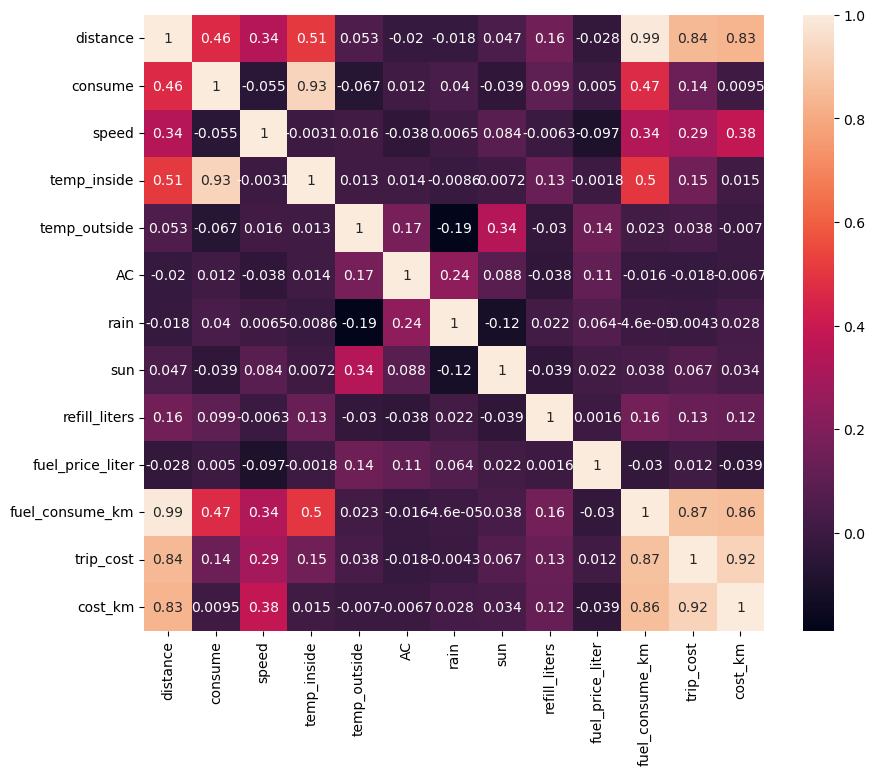

In [16]:
plt.figure(figsize=(10, 8))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True)

We observe that there are no features with high correlation eith our target cosnume in order to drop them.

### Hypothesis Testing

In [17]:
#Creating new dataframes based on one gas type
E10_data = data[~data.eq('SP98').any(axis=1)].reset_index(drop=True)
E10_data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters,specials,gas_type,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,0,0,0,45.0,other,E10,E10,1.38,1.4000,1.960000,0.070000
1,12.0,4.2,30,21.5,13,0,0,0,0.0,other,E10,E10,1.38,0.5040,0.254016,0.021168
2,11.2,5.5,38,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.6160,0.379456,0.033880
3,12.9,3.9,36,21.5,14,0,0,0,0.0,other,E10,E10,1.38,0.5031,0.253110,0.019621
4,18.5,4.5,46,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.8325,0.693056,0.037463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.0,0.0,30,0.0,16,1,1,0,0.0,ac rain,E10,E10,1.38,0.0000,0.000000,0.045345
310,0.0,0.0,42,0.0,15,0,0,0,0.0,other,E10,E10,1.38,0.0000,0.000000,0.045345
311,0.0,0.0,40,0.0,18,0,0,0,0.0,other,E10,E10,1.38,0.0000,0.000000,0.045345
312,0.0,0.0,35,0.0,16,0,0,0,0.0,other,E10,E10,1.38,0.0000,0.000000,0.045345


In [18]:
SP98_data = data[~data.eq('E10').any(axis=1)].reset_index(drop=True)
SP98_data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters,specials,gas_type,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,5.4,3.3,32,21.5,7,0,0,0,37.6,other,SP98,SP98,1.46,0.1782,0.031755,0.005881
1,2.0,9.9,21,21.5,4,0,0,0,0.0,other,SP98,SP98,1.46,0.1980,0.039204,0.019602
2,14.2,5.1,32,21.5,7,0,0,0,0.0,other,SP98,SP98,1.46,0.7242,0.524466,0.036934
3,16.0,4.9,25,21.5,8,0,0,0,0.0,other,SP98,SP98,1.46,0.7840,0.614656,0.038416
4,11.8,4.9,25,21.5,11,0,0,0,0.0,other,SP98,SP98,1.46,0.5782,0.334315,0.028332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,0.0,39,0.0,18,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
436,0.0,0.0,38,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345
437,0.0,0.0,45,0.0,19,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
438,0.0,0.0,42,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345


In [19]:
SP98_data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'refill_liters', 'specials', 'gas_type', 'refill_gas',
       'fuel_price_liter', 'fuel_consume_km', 'trip_cost', 'cost_km'],
      dtype='object')

In [20]:
#Null hypothesis (H0): There is no significant difference in fuel consumption between E10 and SP98.
#Alternative hypothesis (H1): There is a significant difference between E10 and SP98.

In [21]:
test_result = ttest_ind(SP98_data['cost_km'], E10_data['cost_km'], equal_var=False)
test_result

Ttest_indResult(statistic=-1.1258327927755598, pvalue=0.2605956663168368)

The p-value is greater than 0.05 so we fail to reject the Null hypothesis (H0), that there is no significant difference in fuel consumption between E10 and SP98.

In [22]:
#To examine more out hypothesis we will test our features
cost_km = data.groupby('gas_type')['cost_km'].mean()
distance = data.groupby('gas_type')['distance'].mean()

best_cost_km = cost_km.idxmin()
best_distance = distance.idxmax()

if best_cost_km == best_distance:
    best_gas_type = best_cost_km
else:
    best_gas_type = None

print("Cost per KM:")
print(cost_km)
print("\nAverage distance:")
print(distance)
print("\nBest type of gasoline based on cost per kilometer and distance:")
best_gas_type

Cost per KM:
gas_type
E10     0.047195
SP98    0.044025
Name: cost_km, dtype: float64

Average distance:
gas_type
E10     10.749682
SP98     9.658864
Name: distance, dtype: float64

Best type of gasoline based on cost per kilometer and distance:


E10

Based on the features we can say that gas type E10 is slightly better than SP98 regarding the cost per km and the distance.
We conclude that E10 is less combustible.